## Singular value decomposition



Load the [astronaut](https://github.com/scikit-image/scikit-image/blob/main/skimage/data/astronaut.png) image of Eileen Collins from the scikit-image library and reshape
the image to a matrix $X \in \mathbb{R}^{1536×512}$
.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


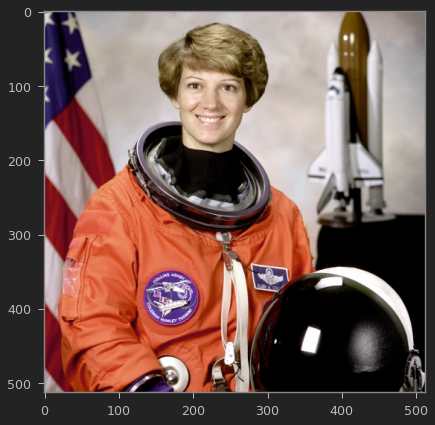

In [8]:
%matplotlib inline
import numpy as np
import numpy.matlib
from scipy.spatial.distance import cdist

from jupyterthemes import jtplot
#jtplot.style(theme="grade3", context="notebook", ticks=True, grid=True)
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

#We import image sk-learn this library
from skimage import data, io
image = data.astronaut()
matrix = image.reshape(-1, 1536)
plt.imshow(image)
plt.grid(False)
plt.show()

Next, we compute the singular decomposition $\text{matrix} = U\Sigma V^\top$ of *matrix* and visualise the singular values (without and with logarithmic scaling).

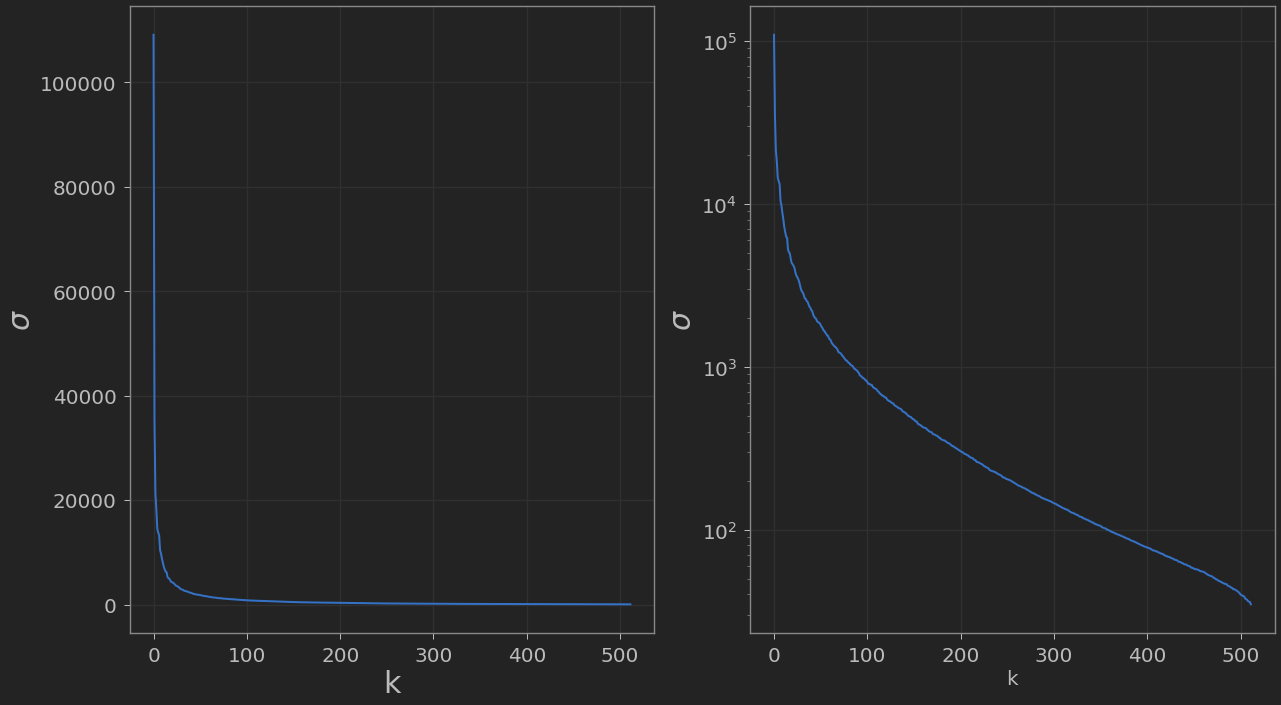

In [21]:
U, singular_values, V_transpose = np.linalg.svd(matrix)

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(singular_values, linewidth=2)
ax1.set_xlabel('k', fontsize=30)
ax1.set_ylabel('$\sigma$', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogy(singular_values, linewidth=2)
ax2.set_xlabel('k', fontsize=20)
ax2.set_ylabel('$\sigma$', fontsize=30)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

Subsequently, we set all singular values after the index *index* to zero and print the ratio of the Frobenius norms, $\|A\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n \|a \|^2 }$, of the approximation and the original matrix. The closer this ratio is to one, the better the approximation. Please experiment with different choices of *index*.

In [23]:
index = 50
singular_values_thresholded = np.copy(singular_values)
singular_values_thresholded[index::] = 0
ratio = np.sqrt(np.sum(singular_values_thresholded ** 2) / np.sum(singular_values ** 2))
print('Ratio of Frobenius norms for low-rank approximation and original matrix: %.4f' %ratio)

Ratio of Frobenius norms for low-rank approximation and original matrix: 0.9965


We compute the approximation by forming a diagonal matrix *Sigma* based on the thresholded singular values *singular_values_thresholded* and multiplying *U* with *Sigma* and *V_transpose*, where *U* and *V_transpose* are the matrices $U$ and $V^\top$ of the SVD. We subsequently visualise the approximation.

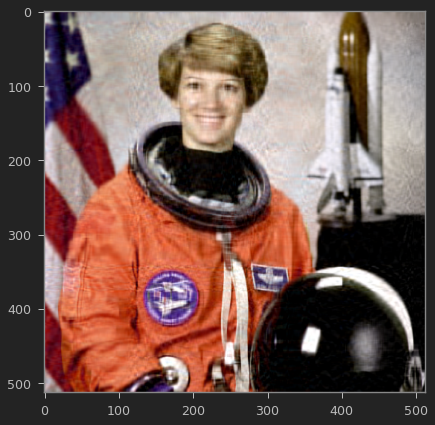

In [25]:
Sigma = np.zeros(matrix.shape)
Sigma[:matrix.shape[0], :matrix.shape[0]] = np.diag(singular_values_thresholded)
matrix_approximation = U @ (Sigma @ V_transpose)
image_approximation = matrix_approximation.reshape(image.shape)
plt.imshow(np.rint(image_approximation).astype(int).clip(0, 255))
plt.grid(False)
plt.show()

If you want to, you can save the images to your hardrives with the following commands.

In [26]:
io.imsave('svd-example-k-' + str(index) + '.png', np.rint(image_approximation).astype(int).clip(0, 255))
io.imsave('astronaut.png', image)

/tmp/ipykernel_25008/140714315.py:1: UserWarning: svd-example-k-50.png is a low contrast image
  io.imsave('svd-example-k-' + str(index) + '.png', np.rint(image_approximation).astype(int).clip(0, 255))
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


We repeat the same experiment but standardise the data first.

In [28]:
def standardise(data):
    data = data - np.mean(data, axis=1).reshape(data.shape[0], 1)
    data = data / np.std(data, axis=1).reshape(data.shape[0], 1)
    return data

matrix_standardised = standardise(matrix)
new_U, new_singular_values, new_V_transpose = np.linalg.svd(matrix_standardised)
new_singular_values_thresholded = np.copy(new_singular_values)
new_singular_values_thresholded[index::] = 0
new_ratio = np.sum(new_singular_values_thresholded ** 2) / np.sum(new_singular_values ** 2)
Sigma = np.zeros(matrix.shape)
Sigma[:matrix.shape[0], :matrix.shape[0]] = np.diag(new_singular_values_thresholded)
new_matrix_approximation = new_U @ (Sigma @ new_V_transpose)
new_image_approximation = new_matrix_approximation.reshape(image.shape)

As before, we visualise the decay of the singular values. 

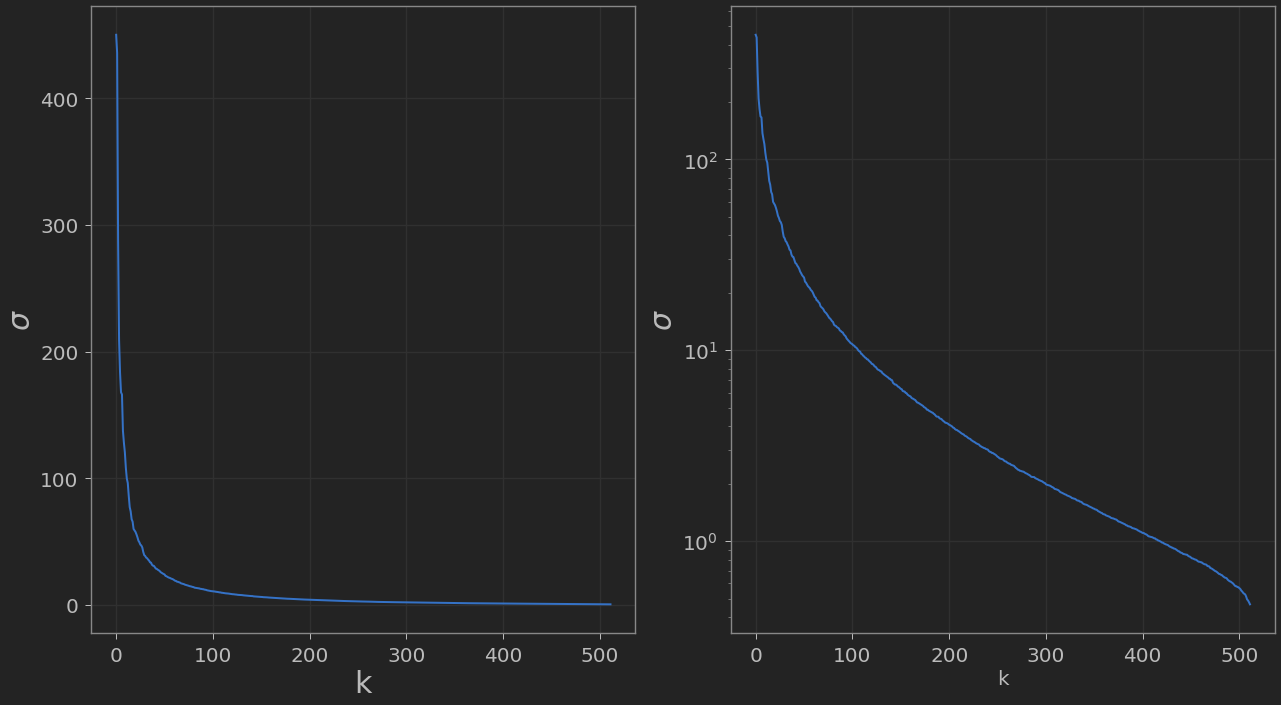

In [31]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(new_singular_values, linewidth=2)
ax1.set_xlabel('k', fontsize=30)
ax1.set_ylabel('$\sigma$', fontsize=30)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogy(new_singular_values, linewidth=2)
ax2.set_xlabel('k', fontsize=20)
ax2.set_ylabel('$\sigma$', fontsize=30)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

The behaviour is similar as before, but the range of the singular values has changed.